In [4]:
import numpy as np
import pandas as pd

train1_path ="hdb_train.csv"
train2_path = "private_train.csv"
feature1_dict_path = "hdb_data_dict.csv"
feature2_dict_path = "private_data_dict.csv"
test1_path = "hdb_test.csv"
test2_path = "private_test.csv"

hdb_raw = pd.read_csv(train1_path,header=0)
private_raw = pd.read_csv(train2_path,header=0)
hdb_feature_list_raw = pd.read_csv(feature1_dict_path,header=0)
private_feature_list_raw = pd.read_csv(feature2_dict_path,header=0)



In [28]:
## feature engineering 
def text2dict(inputs):
    dict_ = {}
    count = 1
    for i in range(len(inputs)):
        if inputs[i] not in dict_:
            dict_[inputs[i]] = count
            count+=1       
    return dict_
    
def dict_embedding(dict_, inputs):
    outputs = []
    for i in range(len(inputs)):
        outputs.append(dict_[inputs[i]])
    return outputs

# do i need to do ranking##
inputs = hdb_raw
f1 = inputs['flat_model']
f1 = dict_embedding(text2dict(f1), f1)

f2 = inputs['flat_type']  
f2 = dict_embedding(text2dict(f2), f2)

f3 = inputs['street_name']  
f3 = dict_embedding(text2dict(f3), f3)

f4 = inputs['town']  
f4 = dict_embedding(text2dict(f4), f4)





In [30]:
##### HDB related
#
print(hdb_feature_list_raw)
#
#
print(f4[200:300])
print(inputs['town'][200:300])


                feature                                      description  \
0                 block                                     Block number   
1            flat_model                                       Flat model   
2             flat_type                                        Flat type   
3        floor_area_sqm                    Area in square meters of flat   
4   lease_commence_date              Year in which 99 year lease started   
5                 month                 MonthYear in which flat was sold   
6          resale_price   Price at which flat was sold. Target variable.   
7          storey_range             Range of storeys where flat was sold   
8           street_name                         Street name of flat sold   
9                  town                      Town in which flat was sold   
10             latitude                            Latitude of flat sold   
11            longitude                           Longitude of flat sold   
12          

In [4]:
# LSTM for sequence classification in the IMDB dataset
#from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Convolution1D, Flatten, Dropout,LSTM,SimpleRNN
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard
from keras.layers import Activation
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error

/Users/zhang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Import Data

In [5]:
train_x_path = 'train.csv'
train_y_path = 'train_label.csv'
#sample_data
#sample_label
#train
#train_label

In [6]:
with open(train_x_path, 'r') as f:
  reader = csv.reader(f)
  X_raw = list(reader)
# with open(train_y_path, 'r') as f:
#   reader = csv.reader(f)
#   y = list(reader)
Y_raw = pd.read_csv(train_y_path,header=0)

In [23]:

print(type(X_raw[0][0]))

#print(type(Y_raw[0][0]))
print('Size of sample size x:',len(X_raw))
print('Size of sample size y:',len(Y_raw))

<class 'str'>
Size of sample size x: 113636
Size of sample size y: 113636


## The maximum length in X_raw

In [8]:
#print(len(max(X_raw, key=len)))
len_list = [len(x) for x in X_raw]


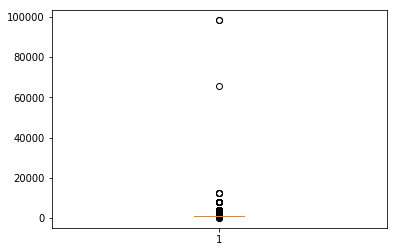

In [10]:
plt.boxplot(len_list)
plt.show();

In [11]:
len_list = pd.DataFrame(len_list)
len_list.describe()
len_list.quantile([.8,.82,.83,.84,.85,.9, .95, .99])

0
count  113636.000000
mean     1512.086566
std      1287.015231
min        36.000000
25%      1024.000000
50%      1024.000000
75%      1024.000000
max     98304.000000

0
0.80  1024.0
0.82  1536.0
0.83  4096.0
0.84  4096.0
0.85  4096.0
0.90  4096.0
0.95  4096.0
0.99  4096.0

In [9]:
# Pad the sequence to the same length
max_length = 1024
print('max_length:', max_length)
X_train = sequence.pad_sequences(X_raw, maxlen=max_length)
#X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

max_length: 1024


In [21]:
Y_train = Y_raw['category'].values
print(type(Y_train[0]))

<class 'numpy.int64'>


In [24]:
# Summarize number of classes
print("Classes: ")
print(np.unique(Y_train))


Classes: 
[0 1]
<class 'str'>


In [25]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(X_train)))


Number of words: 
256
<class 'str'>


In [29]:
# Using embedding from Keras
num_words = np.max(X_train)+1
print('Number of Different values:',num_words)
embedding_length = 100
hidden_units = 50
print(np.max(X_train))

Number of Different values: 256
255
<class 'numpy.int32'>


## CNN

In [30]:
model = Sequential()
model.add(Embedding(num_words, embedding_length, input_length=max_length))
# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(64, 3, padding='same'))
#model.add(Convolution1D(32, 3, padding='same'))
#model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# Log to tensorboard
#tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=1, validation_split=0.2,batch_size=512)

Train on 90908 samples, validate on 22728 samples
Epoch 1/1
90908/90908 [==============================] - 550s 6ms/step - loss: 0.2643 - acc: 0.8838 - val_loss: 0.1942 - val_acc: 0.9143


In [31]:
print("> Training Time : ",Training_time,"s")
print(history.history.keys())
plt.subplot(2,1,1)
plt.plot(history.history['loss'] )
plt.plot(history.history['val_loss'])
plt.subplot(2,1,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show();

NameError: name 'Training_time' is not defined

## RNN

In [ ]:
model = Sequential()
model.add(Embedding(num_words, embedding_length, input_length=max_length))
model.add(SimpleRNN(hidden_units))
model.add(Dropout(0.2))
model.add(Dense(25,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Compile model
start = time.time()
# Log to tensorboard
tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, callbacks=[tensorBoardCallback],validation_split=0.2,batch_size=128)
Training_time = time.time() - start

In [ ]:
print("> Training Time : ",Training_time,"s")
print(history.history.keys())
plt.subplot(2,1,1)
plt.plot(history.history['loss'] )
plt.plot(history.history['val_loss'])
plt.subplot(2,1,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show();

## Prediction

In [ ]:
test_x_path = 'test.csv'

In [ ]:
with open(test_x_path, 'r') as f:
  reader = csv.reader(f)
  X_test_raw = list(reader)

In [32]:
X_test = sequence.pad_sequences(X_test_raw, maxlen=max_length)

NameError: name 'X_test_raw' is not defined

In [33]:
Y_predic = model.predict(X_test)

NameError: name 'X_test' is not defined

In [ ]:
with open('test_predict.csv', 'ab') as f1:
    np.savetxt(f1,Y_predic,delimiter = ',')   

In [ ]:
X_test.shape

## Prediction With label

In [ ]:
test_x_path = 'train.csv'
test_y_path = 'train_label.csv'

In [ ]:
with open(test_x_path, 'r') as f:
  reader = csv.reader(f)
  X_test_raw = list(reader)
Y_test_raw = pd.read_csv(test_y_path,header=0)

In [ ]:
X_test = sequence.pad_sequences(X_test_raw, maxlen=max_length)
Y_test = Y_test_raw['category'].values

In [ ]:
Y_predic = model.predict(X_test)

In [ ]:
# Evaluation on the test set
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))